In [1]:
sc.master

u'local[*]'

In [2]:
global Path    
if sc.master[0:5]=="local" :
   Path="file:/home/hduser/pythonwork/PythonProject/"
else:   
   Path="hdfs://master:9000/user/hduser/"

In [3]:
rawUserData = sc.textFile(Path+"cite75_99.txt")
rawUserData.count()

1000

In [4]:
rawUserData.take(10)

[u'"CITING","CITED"',
 u'3858241,956203',
 u'3858241,1324234',
 u'3858241,3398406',
 u'3858241,3557384',
 u'3858241,3634889',
 u'3858242,1515701',
 u'3858242,3319261',
 u'3858242,3668705',
 u'3858242,3707004']

In [5]:
header = rawUserData.first()
rawUserData = rawUserData.filter(lambda row : row != header)

In [6]:
rawUserData.take(10)

[u'3858241,956203',
 u'3858241,1324234',
 u'3858241,3398406',
 u'3858241,3557384',
 u'3858241,3634889',
 u'3858242,1515701',
 u'3858242,3319261',
 u'3858242,3668705',
 u'3858242,3707004',
 u'3858243,2949611']

In [7]:
def parse_data(line):
    fields = line.split(",")
    return fields[1]

In [8]:
columncited = rawUserData.map(parse_data)

In [9]:
columncited.take(10)

[u'956203',
 u'1324234',
 u'3398406',
 u'3557384',
 u'3634889',
 u'1515701',
 u'3319261',
 u'3668705',
 u'3707004',
 u'2949611']

In [10]:
countsRDD = columncited.map(lambda x : (x , 1)).reduceByKey(lambda x , y : x + y)

In [11]:
result = countsRDD.collect() ##transfer to list

In [12]:
sort_result= sorted(result , key = lambda x : -x[:][1])
sort_result[:5]

[(u'3310865', 2),
 (u'3755824', 2),
 (u'3621837', 2),
 (u'3449992', 1),
 (u'3204343', 1)]

In [13]:
sortRDD=countsRDD.sortBy(lambda pair:pair[1], ascending=False) #print plot
sortRDD.take(5)

[(u'3310865', 2),
 (u'3755824', 2),
 (u'3621837', 2),
 (u'3449992', 1),
 (u'3204343', 1)]

In [14]:
type(sortRDD)

pyspark.rdd.PipelinedRDD

In [15]:
sqlContext = SparkSession.builder.getOrCreate()
from pyspark.sql import Row
user_Rows1 = sortRDD.map(lambda p:
     Row(
         sname=p[0], 
         count=p[1],
            )
)
user_Rows1.take(5)

[Row(count=2, sname=u'3310865'),
 Row(count=2, sname=u'3755824'),
 Row(count=2, sname=u'3621837'),
 Row(count=1, sname=u'3449992'),
 Row(count=1, sname=u'3204343')]

In [16]:
user_df1= sqlContext.createDataFrame(user_Rows1)
user_df1 .printSchema()

root
 |-- count: long (nullable = true)
 |-- sname: string (nullable = true)



In [17]:
user_df1.show(4)

+-----+-------+
|count|  sname|
+-----+-------+
|    2|3310865|
|    2|3755824|
|    2|3621837|
|    1|3449992|
+-----+-------+
only showing top 4 rows



In [18]:
movie_pandas_df =user_df1.toPandas().set_index('sname')
movie_pandas_df2=movie_pandas_df[:5] #dataframe
movie_pandas_df2
movie_pandas_df3=movie_pandas_df[:10] #dataframe
movie_pandas_df3

,count
sname,
3310865,2
3755824,2
3621837,2
3449992,1
3204343,1
2964916,1
3389560,1
3738123,1
3263359,1


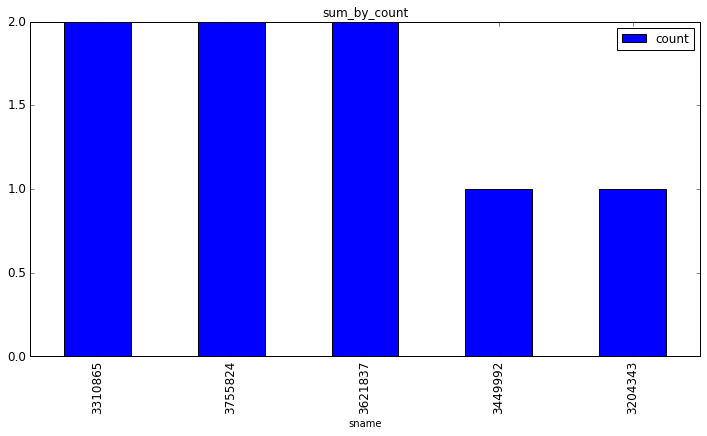

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = movie_pandas_df2 ['count']  \
            .plot(kind='bar', title ="sum_by_count",figsize=(12,6),legend=True, fontsize=12)
plt.show()

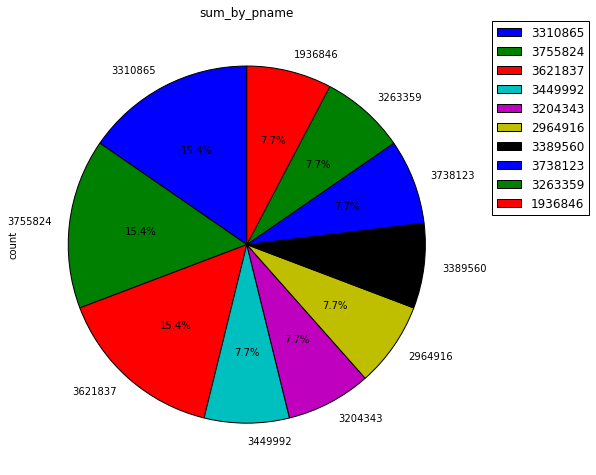

In [20]:
%matplotlib inline

ax =movie_pandas_df3 ['count'] .plot(kind='pie',
           title ="sum_by_pname",figsize=(8,8),startangle=90,autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [22]:
##############citing#######################################
target=rawUserData.first()
# textFile2=textFile.reduce(target)
textFile2 = rawUserData.filter(lambda line: line != target)
textFile2.take(5)

[u'3858241,1324234',
 u'3858241,3398406',
 u'3858241,3557384',
 u'3858241,3634889',
 u'3858242,1515701']

In [23]:
textFile3 =textFile2.map(lambda line: line.split(","))
textFile3.take(5)

[[u'3858241', u'1324234'],
 [u'3858241', u'3398406'],
 [u'3858241', u'3557384'],
 [u'3858241', u'3634889'],
 [u'3858242', u'1515701']]

In [24]:
textFile4=textFile3.map(lambda line:line[0])
textFile4.take(10)

[u'3858241',
 u'3858241',
 u'3858241',
 u'3858241',
 u'3858242',
 u'3858242',
 u'3858242',
 u'3858242',
 u'3858243',
 u'3858243']

In [25]:
stringRDD1=textFile4.map(lambda word : (word, 1)).reduceByKey(lambda x,y : x+y)
stringRDD1.take(5)

[(u'3858364', 10),
 (u'3858365', 5),
 (u'3858366', 2),
 (u'3858367', 1),
 (u'3858360', 4)]

In [26]:
stringRDD2=stringRDD1.sortBy(lambda pair:pair[1], ascending=False)
stringRDD2.take(8)

[(u'3858432', 15),
 (u'3858375', 15),
 (u'3858397', 14),
 (u'3858378', 13),
 (u'3858321', 11),
 (u'3858318', 11),
 (u'3858400', 11),
 (u'3858275', 11)]

In [27]:
sqlContext = SparkSession.builder.getOrCreate()
from pyspark.sql import Row
user_Rows1 = stringRDD2.map(lambda p:
     Row(
         patent=p[0], 
         count=p[1],
            )
)
user_Rows1.take(8)

[Row(count=15, patent=u'3858432'),
 Row(count=15, patent=u'3858375'),
 Row(count=14, patent=u'3858397'),
 Row(count=13, patent=u'3858378'),
 Row(count=11, patent=u'3858321'),
 Row(count=11, patent=u'3858318'),
 Row(count=11, patent=u'3858400'),
 Row(count=11, patent=u'3858275')]

In [28]:
user_df1= sqlContext.createDataFrame(user_Rows1)
user_df1 .printSchema()

root
 |-- count: long (nullable = true)
 |-- patent: string (nullable = true)



In [29]:
user_df1.show()

+-----+-------+
|count| patent|
+-----+-------+
|   15|3858432|
|   15|3858375|
|   14|3858397|
|   13|3858378|
|   11|3858321|
|   11|3858318|
|   11|3858400|
|   11|3858275|
|   10|3858364|
|   10|3858359|
|    9|3858428|
|    9|3858260|
|    9|3858372|
|    8|3858343|
|    8|3858340|
|    8|3858298|
|    8|3858271|
|    8|3858250|
|    8|3858252|
|    8|3858311|
+-----+-------+
only showing top 20 rows



In [33]:
patent_pandas_df =user_df1.toPandas().set_index('patent')
patent_pandas_df.head(8)
patent_pandas_df1=patent_pandas_df[:8]
patent_pandas_df1

,count
patent,
3858432,15
3858375,15
3858397,14
3858378,13
3858321,11
3858318,11
3858400,11
3858275,11


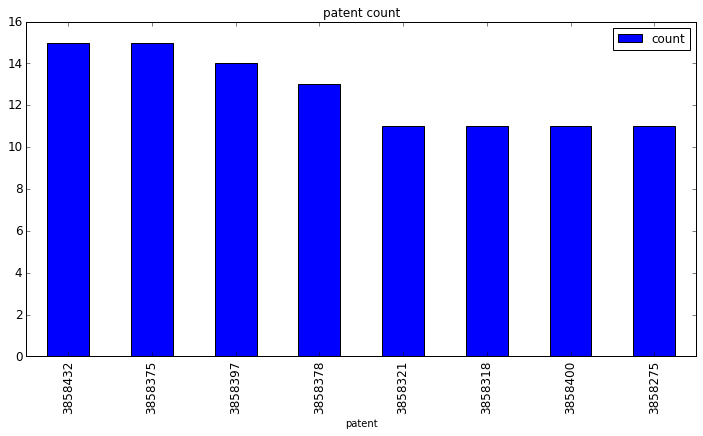

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = patent_pandas_df1 ['count']  \
            .plot(kind='bar', title ="patent count",figsize=(12,6),legend=True, fontsize=12)
plt.show()